In [1]:
%load_ext autoreload
%autoreload 2

import numpy  as np
import pandas as pd
import h5py

import ehtplot
from matplotlib import pyplot as plt, cm

from common import dalt
from common import hallmark as hm
from common import viz

In [2]:
def get(m):
    indices = ['mag', 'aspin', 'Rhigh', 'inc']
    def getone(f, t, s, d):
        df = pd.read_csv(m+f'/stat_{f}_{t}.tsv', sep='\t', usecols=indices+[s]).rename(columns={s:d}).set_index(indices)
        print(len(df))
        return df

    return pd.concat([
        getone('86GHz',  'lc',    'med', 'Fnu_86GHz'   ),
        getone('86GHz',  'major', 'med', 'major_86GHz' ),
        getone('230GHz', 'mi3',   'med', 'mi3_230GHz'  ),
        getone('230GHz', 'major', 'med', 'major_230GHz'),
        getone('230GHz', 'minor', 'med', 'minor_230GHz'),
        getone('NIR',    'sed',   'med', 'Fnu_NIR'     ),
        getone('xray',   'sed',   'med', 'nuLnu_xray'  ),
        # mring radius
        # mring width
        # mring asymmetry
        # null locations
    ], axis=1)

df = get('cache/Illinois_thermal_w5')
df.reset_index(inplace=True)

360
360
360
360
360
360
360


In [3]:
df

,mag,aspin,Rhigh,inc,Fnu_86GHz,major_86GHz,mi3_230GHz,major_230GHz,minor_230GHz,Fnu_NIR,nuLnu_xray
0,M,-0.94,1,10,4.128221,141.704070,0.135767,96.193672,89.040751,0.007323,2.590576e+33
1,M,-0.94,1,30,3.799379,137.318895,0.111759,92.497280,82.274058,0.007888,3.391995e+33
2,M,-0.94,1,50,3.488111,129.405098,0.107607,86.962015,74.638354,0.012274,4.172830e+33
3,M,-0.94,1,70,3.115345,120.161725,0.156489,81.529623,66.676077,0.019763,4.914111e+33
4,M,-0.94,1,90,2.837611,114.646514,0.174842,78.691264,61.707591,0.021651,6.442265e+33
...,...,...,...,...,...,...,...,...,...,...,...
355,S,0.94,160,90,1.626199,207.892579,0.063765,91.440262,30.053389,0.005971,1.790556e+33
356,S,0.94,160,110,1.617867,205.702406,0.067706,90.589398,31.317978,0.006086,1.587710e+33
357,S,0.94,160,130,1.757421,197.969223,0.069432,86.349716,37.115531,0.001296,3.032145e+32
358,S,0.94,160,150,2.067868,181.613176,0.068869,82.397093,50.127212,0.000102,6.354944e+31


In [4]:
magmap = {'M':'MAD', 'S':'SANE'}

mag   = df.mag  .unique()
aspin = df.aspin.unique()
Rhigh = df.Rhigh.unique()
inc   = df.inc  .unique()

In [11]:
def plot(ax, df):
    ax.plot(df.inc, df.nuLnu_xray)
    ax.set_yscale('log')
    ax.set_ylim(5e30, 2e35)

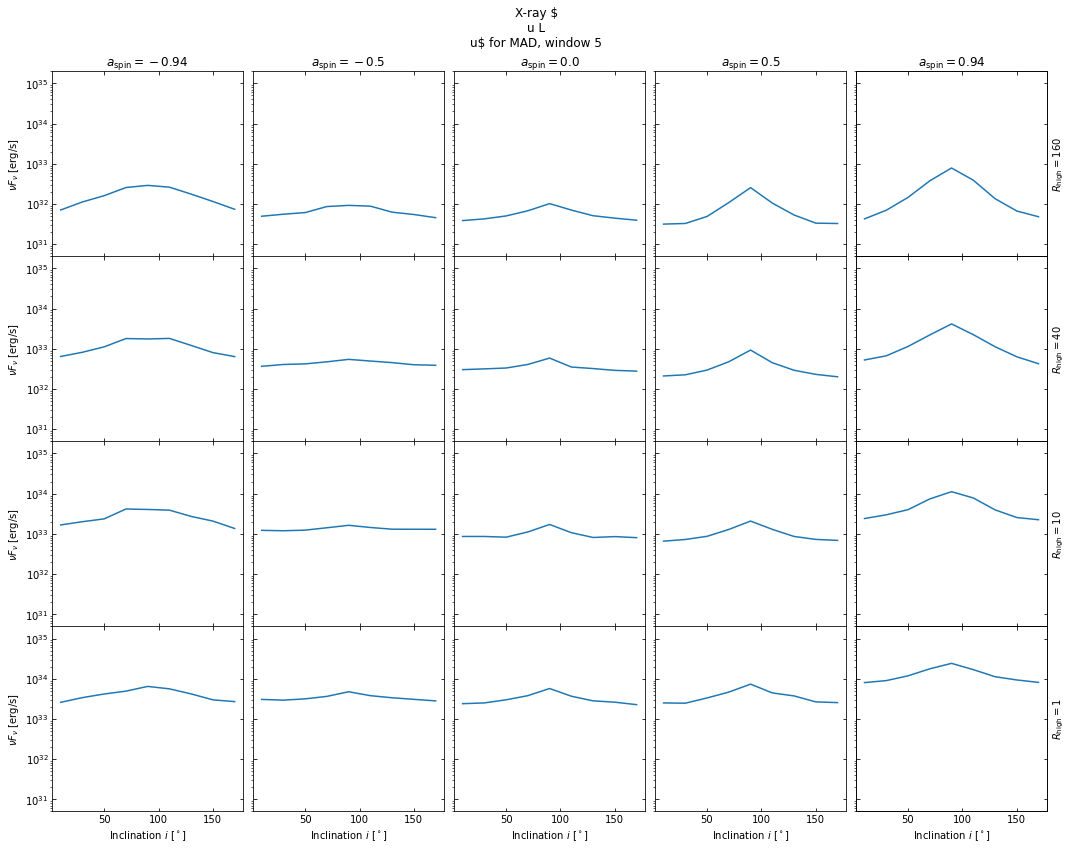

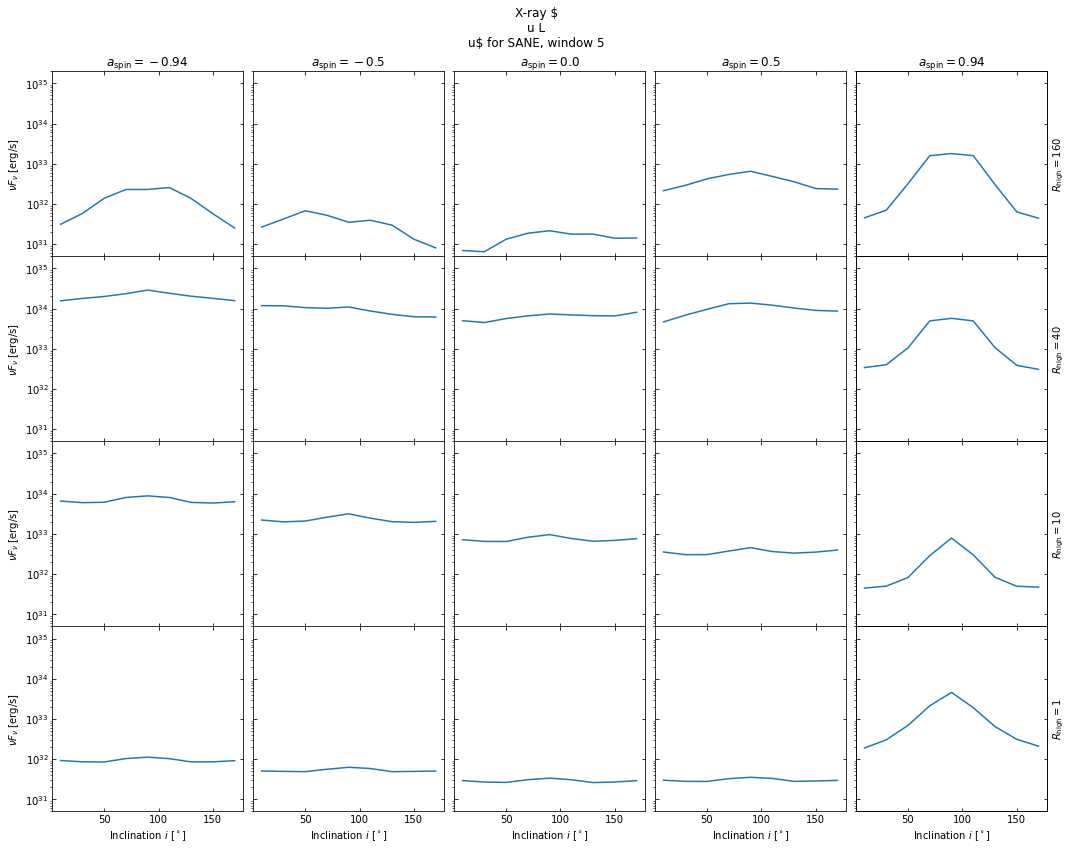

In [12]:
for m in mag:
    viz.grid(
        df(mag=m).sort_values('inc'), plot, aspin=aspin, Rhigh=Rhigh[::-1],
        figsize=(15,12), title=f'X-ray $\nu L\nu$ for {magmap[m]}, window 5',
        xtitle=r'$a_\mathrm{{spin}}={}$',     ytitle=r'$R_\mathrm{{high}}={}$',
        xlabel=r'Inclination $i$ [$^\circ$]', ylabel=r'$\nu F_\nu$ [erg/s]',
        fout=f'output/plot/stat_xray_{magmap[m]}',
    )